### imports

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='AppleGothic')
import warnings
warnings.filterwarnings(action='ignore')

df_raw=pd.read_csv('../data/raw_data/train.csv')
df=df_raw.copy()

sample_submission_raw=pd.read_csv('../data/raw_data/sample_submission.csv')
sample_submission=sample_submission_raw.copy()

### preprocessing

In [2]:
df['일시']=pd.to_datetime(df['일시'],format="%Y%m%d")
df.set_index('일시',inplace=True)

df['일'] = df.index.day
df['월'] = df.index.month
df['년'] = df.index.year

df['요일']=df.index.day_of_week
df['주말평일'] = df['요일'].apply(lambda x: '평일' if x < 5 else '주말')

# --

sample_submission['일시']=pd.to_datetime(sample_submission['일시'],format="%Y%m%d")
sample_submission.set_index('일시',inplace=True)

sample_submission['일'] = sample_submission.index.day
sample_submission['월'] = sample_submission.index.month
sample_submission['년'] = sample_submission.index.year

sample_submission['요일']=sample_submission.index.day_of_week
sample_submission['주말평일'] = sample_submission['요일'].apply(lambda x: '평일' if x < 5 else '주말')

In [4]:
from pytimekr import pytimekr
def get_holiday(_year):
    holidays=[]
    for holiday in pytimekr.holidays(year=_year):
        if pytimekr.red_days(holiday) != None:
            ans = [i.strftime("%Y-%m-%d") for i in pytimekr.red_days(holiday)]
            holidays.extend(ans)
        else:
            ans=holiday.strftime("%Y-%m-%d")
            holidays.append(ans)
    return list(set(holidays))

In [5]:
df.loc[get_holiday(2018),'주말평일'] = '주말'
df.loc[get_holiday(2019),'주말평일'] = '주말'
df.loc[get_holiday(2020),'주말평일'] = '주말'
df.loc[get_holiday(2021),'주말평일'] = '주말'
sample_submission.loc[sorted(get_holiday(2022))[:-1],'주말평일'] ='주말'

In [6]:
df_2018_raw = df[df.index.year == 2018]
df_2019_raw = df[df.index.year == 2019]
df_2020_raw = df[df.index.year == 2020]
df_2021_raw = df[df.index.year == 2021]

In [13]:
# 2
import numpy as np 

train_data = df.copy()
test_data_2 = sample_submission.copy()

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

df_2018 = train_data[train_data.index.year == 2018]
df_2019 = train_data[train_data.index.year == 2019]
df_2020 = train_data[train_data.index.year == 2020]
df_2021 = train_data[train_data.index.year == 2021]

for col in df_2018.columns[:4]:
    df_2018[col][15:] = smooth(df_2018[col],10)[15:]
for col in df_2019.columns[:4]:
    df_2019[col][15:] = smooth(df_2019[col],10)[15:]
for col in df_2020.columns[:4]:
    df_2020[col][15:] = smooth(df_2020[col],10)[15:]
for col in df_2021.columns[:4]:
    df_2021[col][15:] = smooth(df_2021[col],10)[15:]

train_data=pd.concat([df_2018,df_2019,df_2020,df_2021])

### data spilt

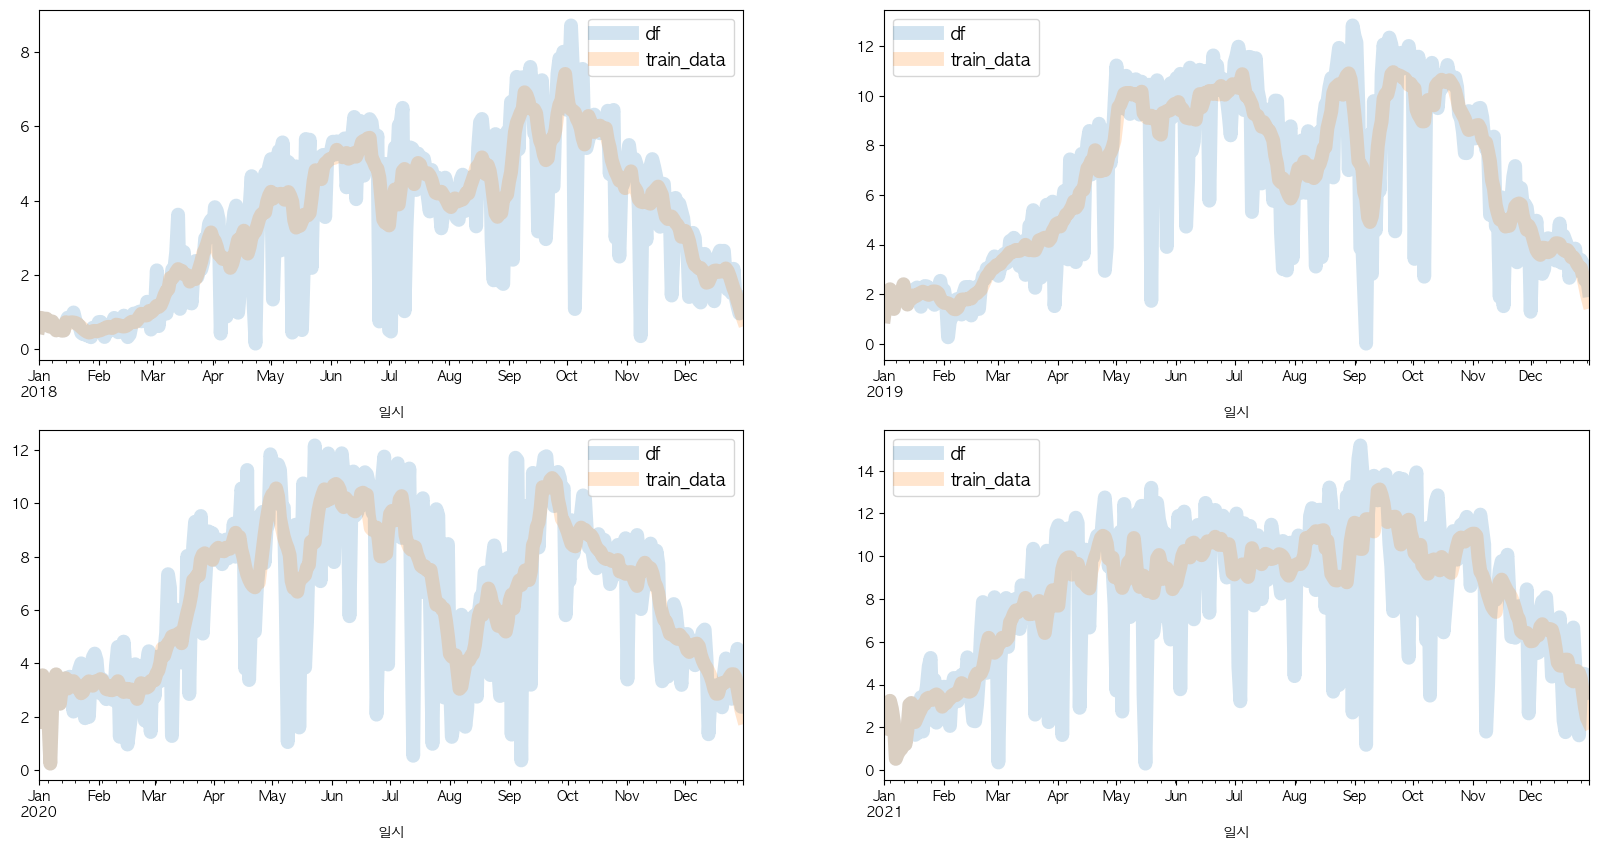

In [16]:
plt.subplot(2,2,1)
df[df['년']==2018].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='df')
train_data[train_data['년']==2018].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='train_data')
plt.legend(fontsize=13)
plt.subplot(2,2,2)
df[df['년']==2019].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='df')
train_data[train_data['년']==2019].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='train_data')
plt.legend(fontsize=13)
plt.subplot(2,2,3)
df[df['년']==2020].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='df')
train_data[train_data['년']==2020].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='train_data')
plt.legend(fontsize=13)
plt.subplot(2,2,4)
df[df['년']==2021].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='df')
train_data[train_data['년']==2021].iloc[:,0].plot(figsize=(20,10),alpha=0.2,lw=10,label='train_data')
plt.legend(fontsize=13)
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_2018.iloc[:,:4]=mms.fit_transform(df_2018.iloc[:,:4])
df_2019.iloc[:,:4]=mms.fit_transform(df_2019.iloc[:,:4])
df_2020.iloc[:,:4]=mms.fit_transform(df_2020.iloc[:,:4])
df_2021.iloc[:,:4]=mms.fit_transform(df_2021.iloc[:,:4])

In [28]:
# data for yearly movement
df_yearly_movement=pd.concat([df_2018,df_2019,df_2020,df_2021]).drop(['년'],axis=1)

,광진구,동대문구,성동구,중랑구,일,월,년,요일,주말평일
일시,,,,,,,,,
2018-01-01,0.592,0.368,0.580,0.162,1,1,2018,0,주말
2018-01-02,0.840,0.614,1.034,0.260,2,1,2018,1,평일
2018-01-03,0.828,0.576,0.952,0.288,3,1,2018,2,평일
2018-01-04,0.792,0.542,0.914,0.292,4,1,2018,3,평일
2018-01-05,0.818,0.602,0.994,0.308,5,1,2018,4,평일
...,...,...,...,...,...,...,...,...,...
2021-12-27,3.830,3.416,2.908,2.350,27,12,2021,0,평일
2021-12-28,4.510,3.890,3.714,2.700,28,12,2021,1,평일
2021-12-29,4.490,3.524,3.660,2.524,29,12,2021,2,평일


In [46]:
# 2
import numpy as np 

train_data = df.copy()
test_data_2 = sample_submission.copy()

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

df_2018 = train_data[train_data.index.year == 2018]
df_2019 = train_data[train_data.index.year == 2019]
df_2020 = train_data[train_data.index.year == 2020]
df_2021 = train_data[train_data.index.year == 2021]

for col in df_2018.columns[:4]:
    df_2018[col][15:] = smooth(df_2018[col],10)[15:]
for col in df_2019.columns[:4]:
    df_2019[col][15:] = smooth(df_2019[col],10)[15:]
for col in df_2020.columns[:4]:
    df_2020[col][15:] = smooth(df_2020[col],10)[15:]
for col in df_2021.columns[:4]:
    df_2021[col][15:] = smooth(df_2021[col],10)[15:]

df_2020.drop('2020-02-29',inplace=True)

train_data=pd.concat([df_2018,df_2019,df_2020,df_2021])

In [55]:
train_data['월_일'] = train_data['월'].apply(lambda x: str(x)+'_')+train_data['일'].apply(lambda x: str(x))

In [101]:
diff_df = list()
for i in train_data['월_일'].unique():
    temp=train_data[train_data['월_일'] == i].iloc[:,:4].diff().fillna(1)
    diff_mean=pd.DataFrame((temp.iloc[0,:]*1 + temp.iloc[1,:]*2 + temp.iloc[2,:]*3 + temp.iloc[2,:]*4)/10,
                           columns=[str(temp.index[0]).split('-')[1] +'_'+ str(temp.index[0]).split('-')[-1].split()[0]])
    diff_df.append(diff_mean)

In [102]:
# diff ratio
diff_df=pd.concat(diff_df,axis=1)

,01_01,01_02,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,...,12_22,12_23,12_24,12_25,12_26,12_27,12_28,12_29,12_30,12_31
광진구,0.6848,1.3694,1.4650,1.1322,1.2556,0.6312,-0.8662,0.6806,1.365,1.4398,...,0.23752,0.27110,0.45552,0.64208,0.73696,0.70012,0.60574,0.52364,0.48142,0.47538
동대문구,0.5882,0.8932,0.9634,0.8074,0.7080,0.4454,-0.4768,0.5570,0.919,0.8844,...,0.60698,0.61954,0.74922,0.90880,0.97104,0.92710,0.81632,0.70568,0.63116,0.58128
성동구,0.6144,1.0640,1.1308,0.5024,0.7080,0.4738,-0.7238,0.6416,1.002,1.0412,...,0.40270,0.44276,0.65838,0.87110,0.96660,0.89964,0.78220,0.69112,0.63648,0.58802
중랑구,0.5382,0.6954,0.8052,0.5920,0.6164,0.2886,-0.2778,0.4188,0.717,0.6286,...,0.51612,0.53058,0.61090,0.69278,0.71404,0.69416,0.62056,0.54144,0.48854,0.44860
